In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Read the data 

In [2]:
# Importing cookies.csv
cookies = pd.read_csv('cookies.csv')

In [3]:
# taking a look at the content of the dataframe
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


### Exploratory Data Analysis and Descriptive Statistics

In [4]:
# exploring data info
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

## Bake time 

In [5]:

cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

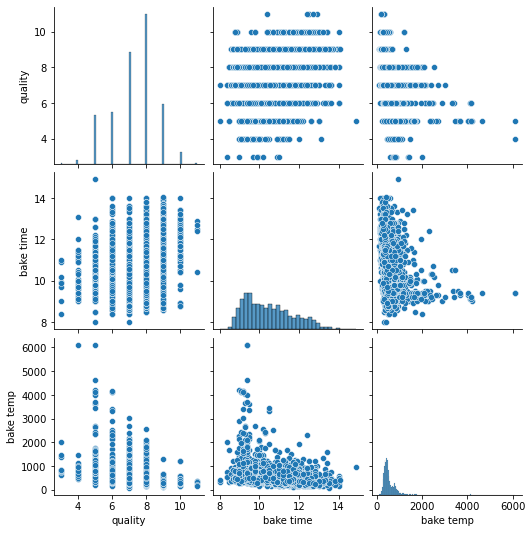

In [6]:
sns.pairplot(cookies[['quality', 'bake time', 'bake temp']])

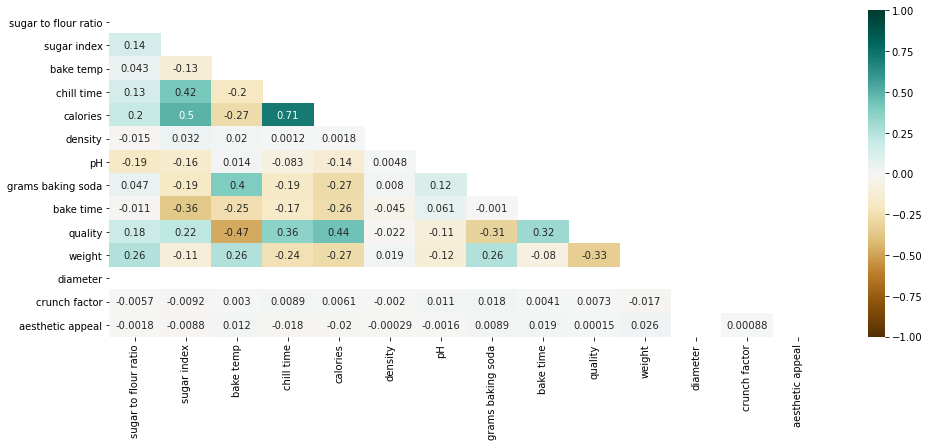

In [7]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [8]:
num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))

sugar to flour ratio --> 0.1821346059774523
sugar index --> 0.220653522443354
bake temp --> -0.4705037090124243
chill time --> 0.3646530350431328
calories --> 0.4398363987447586
density --> -0.021995308762374953
pH --> -0.11472101703648839
grams baking soda --> -0.305340383089796
bake time --> 0.31530707105261135
quality --> 1.0
weight --> -0.32829940172664246
diameter --> nan
crunch factor --> 0.0072620504400501195
aesthetic appeal --> 0.0001514226612548425


## butter

In [9]:
cookies['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

## aesthetic appeal

In [10]:
cookies['aesthetic appeal'].value_counts()


3    5195
4       3
Name: aesthetic appeal, dtype: int64

Thoughts on aesthetics : 
    not many values - drop column 

## weight

In [11]:
cookies['weight'].describe()

count    5198.000000
mean       14.381935
std         3.023740
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [12]:
cookies['weight'].unique()

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        12.8,  13. ,  14. ,  12. ,  14.6,  15.6,  13.4,  16.8,  14.8,
        13.6,  16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,
        10.4,  11.8,  11.6,  15.4,  21.6,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

Thoughts on weight : 

    Remove -99 value

## diameter

In [13]:
cookies['diameter'].unique()

array([7])

Thoughts on diameter : 

    All equal to 7 - column can be dropped 

## bake time

In [14]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [15]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

Thoughts on Bake time 

    judging by the spread of nulls across quality bands, any missing values could be replaced by mean or rows dropped 

## crunch factor

<AxesSubplot:ylabel='Frequency'>

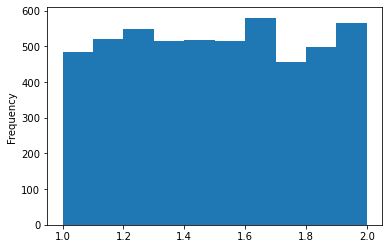

In [16]:
cookies['crunch factor'].plot.hist()

## mixins

In [17]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [18]:
cookies['mixins']

0                     raisins
1                     raisins
2             nuts, chocolate
3                   chocolate
4       nuts, oats, chocolate
                ...          
5193            peanut butter
5194                  raisins
5195          chocolate, oats
5196                chocolate
5197                chocolate
Name: mixins, Length: 5198, dtype: object

In [19]:
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [20]:
cookies['mixins'].nunique()

13

### Wrangling the data / making small changes 

In [21]:
cookies.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [22]:
cookies=cookies.dropna(subset=['mixins'])

In [23]:
cookies.reset_index(drop=True, inplace=True)

In [24]:
cookies['chocolate'] = 0
cookies['raisins'] = 0
cookies['oats'] = 0
cookies['nuts'] = 0
cookies['peanut butter'] = 0

In [25]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,mixins,crunch factor,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,raisins,1.30,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,raisins,1.71,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,"nuts, chocolate",1.78,0,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,chocolate,1.59,0,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,"nuts, oats, chocolate",1.30,0,0,0,0,0


In [26]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies)):
        if mix in [x.strip() for x in cookies.loc[i, 'mixins'].split(',')]:
            cookies.loc[i, mix] = 1

In [27]:
cookies.drop(columns=["mixins"], inplace=True)

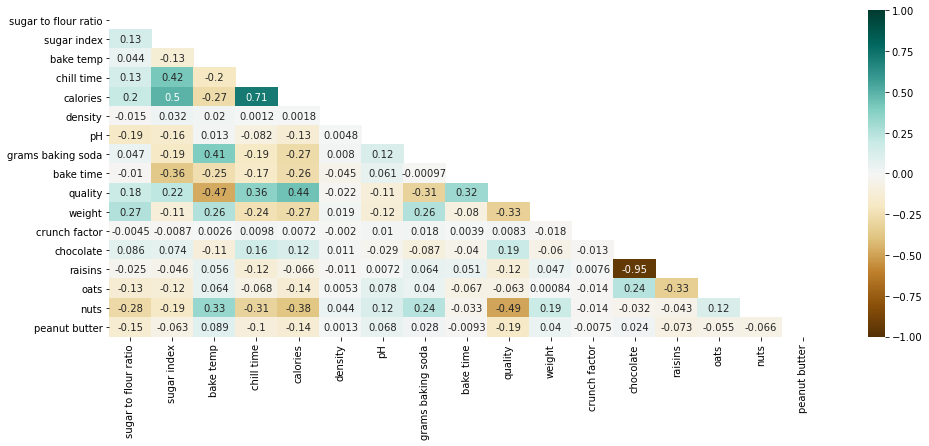

In [28]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

### pre processing- drop NANs and deal with non numerical data


In [29]:
cookies.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
crunch factor           float64
chocolate                 int64
raisins                   int64
oats                      int64
nuts                      int64
peanut butter             int64
dtype: object

In [30]:
cookies=pd.get_dummies(cookies, columns=['butter type'])


In [31]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5196 non-null   float64
 1   sugar index           5191 non-null   float64
 2   bake temp             5196 non-null   int64  
 3   chill time            5196 non-null   float64
 4   calories              5196 non-null   float64
 5   density               5196 non-null   float64
 6   pH                    5196 non-null   float64
 7   grams baking soda     5196 non-null   float64
 8   bake time             5186 non-null   float64
 9   quality               5196 non-null   int64  
 10  weight                5196 non-null   float64
 11  crunch factor         5196 non-null   float64
 12  chocolate             5196 non-null   int64  
 13  raisins               5196 non-null   int64  
 14  oats                  5196 non-null   int64  
 15  nuts                 

In [32]:
cookies = cookies.dropna()

In [33]:
cookies.reset_index(drop=True, inplace=True)

### Split data into dependent and independent variables 

In [34]:
X= cookies.drop(columns="quality")
y=cookies.quality

### Preprocessing - scaling 

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.1, random_state=40)


### get model, fit, make predictions  AND evaluate

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [39]:
predictions  = lm.predict(X_test)

In [40]:
predictions

array([   7.87258072,    7.91771875,    7.99728812,    7.59543719,
          7.36946762,    7.54555908,    6.29680171,    5.00894655,
          7.95731305,    8.581827  ,    8.15093187,    7.3324341 ,
          8.07034461,    8.27887586,    7.5472386 ,    7.11417161,
          7.92028416,    8.58991383,    8.08492805,    5.5128639 ,
          7.64220995,    7.87015418,    8.12417485,    8.52865226,
          8.51131914,    7.03826782,    7.35752063,    6.73588101,
          6.26292249,    8.51082477,    5.68614641,    5.75489192,
          8.22851198,    7.21093688,    6.50725649,    6.4154661 ,
          5.57686646,    8.15749093,    6.033516  ,    8.24742492,
          8.03568269,    5.32259946,    7.58152587,    6.12310561,
          5.06630945,    5.44778934,    7.58885775,    7.41331248,
          7.75405879,    8.01229071,    7.53463982,    5.26852912,
          6.72260451,    8.58429674,    6.08409235,    7.8727646 ,
          7.6014881 ,    7.84494766,    8.61219176,    6.21248

In [41]:
r2_score(y_test, predictions)

-22.552442430677534

In [42]:
mse = mean_squared_error(y_test, predictions)
print(mse)

41.178323302884


In [43]:
import math 
rmse = math.sqrt(mse)
print(rmse)

6.4170338399360185


### Make predictions on the cookies_validate dataset (without labels)

In [44]:
cookies_val = pd.read_csv('cookies_validate.csv')

In [45]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    779 non-null    int64  
 1   sugar to flour ratio  779 non-null    float64
 2   sugar index           779 non-null    float64
 3   bake temp             779 non-null    float64
 4   chill time            779 non-null    float64
 5   calories              779 non-null    float64
 6   density               779 non-null    float64
 7   pH                    779 non-null    float64
 8   grams baking soda     779 non-null    float64
 9   bake time             779 non-null    float64
 10  quality               779 non-null    int64  
 11  butter type           779 non-null    object 
 12  weight                779 non-null    float64
 13  diameter              779 non-null    int64  
 14  mixins                779 non-null    object 
 15  crunch factor         7

In [46]:
cookies_val.drop(columns=["aesthetic appeal", "diameter"], inplace=True)

In [47]:
cookies_val['chocolate'] = 0
cookies_val['raisins'] = 0
cookies_val['oats'] = 0
cookies_val['nuts'] = 0
cookies_val['peanut butter'] = 0

In [48]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
for mix in mixins:
    for i in range(len(cookies_val)):
        if mix in [x.strip() for x in cookies_val.loc[i, 'mixins'].split(',')]:
            cookies_val.loc[i, mix] = 1
            
cookies_val.drop(columns=["mixins"], inplace=True)

In [49]:
cookies_val.drop(columns= 'id', inplace=True)

In [50]:
cookies_val=pd.get_dummies(cookies_val, columns=['butter type'])

In [51]:
cookies_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  779 non-null    float64
 1   sugar index           779 non-null    float64
 2   bake temp             779 non-null    float64
 3   chill time            779 non-null    float64
 4   calories              779 non-null    float64
 5   density               779 non-null    float64
 6   pH                    779 non-null    float64
 7   grams baking soda     779 non-null    float64
 8   bake time             779 non-null    float64
 9   quality               779 non-null    int64  
 10  weight                779 non-null    float64
 11  crunch factor         779 non-null    float64
 12  chocolate             779 non-null    int64  
 13  raisins               779 non-null    int64  
 14  oats                  779 non-null    int64  
 15  nuts                  7

In [52]:
X_val = cookies_val.drop(columns="quality")

In [53]:
X_val_scaled = scaler.fit_transform(X_val)

In [54]:
predictions_val=lm.predict(X_val_scaled)

In [55]:
predictions_val

array([  4.21817735,   7.97002524,   5.73645256,   9.51268581,
         5.44123213,   6.69094278,   8.50019825,   5.74263918,
         7.83899812,   7.53124007,   6.61253016,   8.11696475,
         7.32885399,   8.86958113,   9.8873583 ,   5.99365221,
         4.61452105,   7.98945161,  10.5726779 ,   9.30998457,
         8.81403807,   8.02009332,   9.61285216,   4.97518006,
         5.75435267,   5.11601729,   7.29373223,   8.57275261,
         5.08784944,   5.98532943,   8.35590727,   6.27208554,
         5.17303016,   7.95305331,   9.11683099,   8.43684173,
         9.69455136,   9.09887792,   6.48494351,   6.63172189,
         8.83361792,   8.6528916 ,   8.12755921,   7.99373188,
         6.08632621,   6.59395407,   6.39054881,   8.88412319,
         4.22345648,   6.37750861,   5.20649747,   5.18216664,
         7.65935903,   5.76083388,   3.97282079,   8.51859316,
         4.88825584,   8.70545434,   9.58343857,   9.22245485,
         6.64365484,   8.23045167,   7.35351669,   9.29

### assess predictions against the test data (with labels)

In [56]:
cookies_test = pd.read_csv('cookies_test.csv')

In [57]:
y_real = cookies_test["quality"]

In [58]:
y_real.describe()

count    779.000000
mean       7.661104
std        1.093643
min        4.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       10.000000
Name: quality, dtype: float64

In [59]:
mean_squared_error(y_real, predictions_val, squared = False)

2.107393176315753

### Can we get more accuracy with an ensemble method?

#### Task 4 : Add a random forest regressor model to try to get a more accurate score. 

You can follow https://www.geeksforgeeks.org/random-forest-regression-in-python/
or the sklearn_documentation https://scikit-learn.org/stable/search.html?q=random+forest
to import the regressor and fit it to your data, before running the cells below which will calculate your new RMSE accuracy score


### <span style="color:#306998">Random Forest</span>
<span style="color:#306998">
A random forest is an ensemble machine learning technique — a random forest contains many decision trees that all work together to classify new points. When a random forest is asked to classify a new point, the random forest gives that point to each of the decision trees. Each of those trees reports their classification and the random forest returns the most popular classification. It’s like every tree gets a vote, and the most popular classification wins.<br>
Some of the trees in the random forest may be overfit, but by making the prediction based on a large number of trees, overfitting will have less of an impact.
</span>  

In [70]:
#Task 4 your code: 
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# Setup random seed
np.random.seed(42)

# Create the data
X= cookies.drop(columns="quality")
y=cookies.quality

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Instatiate Random Forest Regressor
# create regressor object
regressor = RandomForestRegressor(n_estimators=100)

In [71]:
# fit the regressor with X_train and y_train data
regressor.fit(X_train, y_train) 

RandomForestRegressor()

In [72]:
predictions_new = regressor.predict(X_val_scaled)

In [73]:
# Evaluate de Random Forest Regressor
regressor.score(X_test, y_test)

0.7653791602716767

### Evaluate random forest accuracy 

RMSE accuracy Score - depending on what you named your model and predictions this code may need to be adapted

ie if your model is called 'new model' and you have created a prediction from this model 'predictions_new' then edit the code block below as: 
    
    mean_squared_error(y_real, predictions_new, squared = False)
    

In [74]:
#EDIT as appropriate to get your RMSE 

mean_squared_error(y_real, predictions_new, squared = False)

2.2196346077769373